## UNAD Universidad Nacional Abierta y a Distancia
## Oscar Euclidez Rocha Gómez
## Predicción Con Regresión Logística


In [207]:
import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
import plotly.express as px
# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler


## Paso 1 

## Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [18]:
# lectura de datos en Python y lo cargamos en la variable Datos

datos = pd.read_csv("C:\\Users\\Oscar Rocha Gomez\\Documents\\UNAD\\16-04-II-2024\\ANALISIS DE DATOS\\Titanic-Dataset.csv")

In [22]:
# Realizamos lectura de los Datos para el análisis exploratorio
datos.head(40)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [24]:
# Descripción de los datos
datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

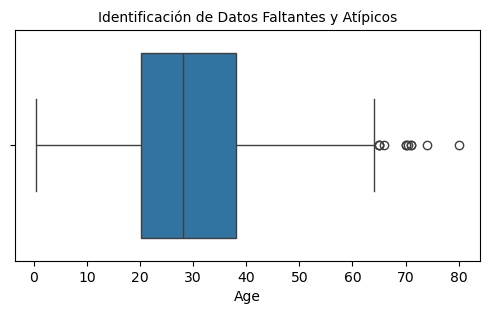

In [30]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=datos['Age'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

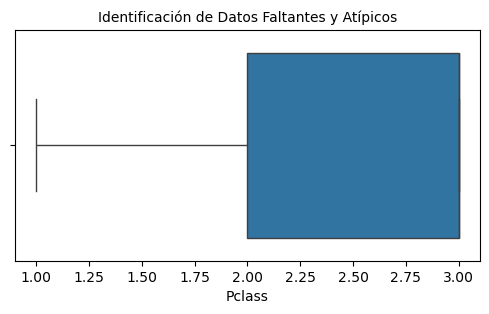

In [36]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=datos['Pclass'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

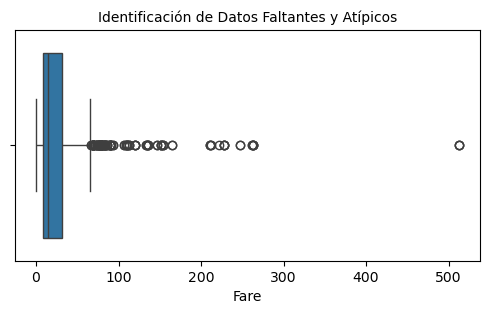

In [46]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=datos['Fare'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [48]:
datos.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [70]:
datos= datos.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)

In [72]:
datos.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [76]:
datos=pd.get_dummies(datos,columns=["Sex","Embarked"],drop_first=True)

In [ ]:
# Hacemos que cambie la variable 0 y 1 por falso y verdadero para ayudar a nuestro modelo 

In [78]:
datos.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [ ]:
# ahora para los datos nulos le indicamos a nuestro modelo que promedie  con valores para no alterar la base de la edad que es donde nos faltan registros 

In [80]:
datos["Age"].fillna(datos["Age"].mean(), inplace=True)

C:\Users\Oscar Rocha Gomez\AppData\Local\Temp\ipykernel_23796\4210551942.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datos["Age"].fillna(datos["Age"].mean(), inplace=True)


In [96]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_male    891 non-null    bool   
 7   Embarked_Q  891 non-null    bool   
 8   Embarked_S  891 non-null    bool   
dtypes: bool(3), float64(2), int64(4)
memory usage: 44.5 KB


In [ ]:
# como podemos ver ya nos lleno en el atributo Age el total de datos equivalente a 891 registros 

## 3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

## Caracteristica de Interes:
Survived: si la persona Sobrevivio o no (0 = No Sobrevivio al naufragio - 1 = Si Sobrevvio al Naugragio) 
Predecir si una persona puede sobrevivir

In [91]:
datos['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [93]:
datos[['Survived']].head(40)

,Survived
0,0
1,1
2,1
3,1
4,0
5,0
6,0
7,0
8,1
9,1


## 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [ ]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento


In [99]:
x = datos.drop(["Survived"], axis=1)	

y = datos["Survived"]
               

In [101]:
x.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,True,False,True
1,1,38.0,1,0,71.2833,False,False,False
2,3,26.0,0,0,7.9250,False,False,True
3,1,35.0,1,0,53.1000,False,False,True
4,3,35.0,0,0,8.0500,True,False,True


In [103]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [135]:
#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, stratify=y, random_state= 42)

In [294]:
print (x_train)

     Pclass        Age  SibSp  Parch      Fare  Sex_male  Embarked_Q  \
692       3  29.699118      0      0   56.4958      True       False   
481       2  29.699118      0      0    0.0000      True       False   
527       1  29.699118      0      0  221.7792      True       False   
855       3  18.000000      0      1    9.3500     False       False   
801       2  31.000000      1      1   26.2500     False       False   
..      ...        ...    ...    ...       ...       ...         ...   
359       3  29.699118      0      0    7.8792     False        True   
258       1  35.000000      0      0  512.3292     False       False   
736       3  48.000000      1      3   34.3750     False       False   
462       1  47.000000      0      0   38.5000      True       False   
507       1  29.699118      0      0   26.5500      True       False   

     Embarked_S  
692        True  
481        True  
527        True  
855        True  
801        True  
..          ...  
359      

In [296]:
print (y_train)

692    1
481    0
527    0
855    1
801    1
      ..
359    1
258    1
736    0
462    0
507    1
Name: Survived, Length: 712, dtype: int64


## 5. Entrenar el modelo configurando los diferentes hiperparámetros

In [298]:
# Construir el modelo de regresión logística 

modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (x_train , y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(x_test) # la función predict predice los valores a partir del conjunto de datos de validación

In [300]:
modelo_regresion = LogisticRegression()

In [302]:
modelo_regresion.fit (x_train , y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [304]:
print (y_test)

565    0
160    0
553    1
860    0
241    1
      ..
880    1
91     0
883    0
473    1
637    0
Name: Survived, Length: 179, dtype: int64


In [306]:
print (Prediccion)

[0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 1 1
 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0
 1 1 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0]


In [308]:
y_pred = modelo_regresion.predict(x_test)

In [ ]:
# Precisar la prediccion de este modelo y ver que datos nos muestra

 ## 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc

In [331]:
# Desempeño del modelo de regresión

print(classification_report(y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       110
           1       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



In [310]:
accuracy = accuracy_score(y_test, y_pred)
print("precisión:", accuracy) 

precisión: 0.8100558659217877


## 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

In [312]:
print("Matriz de confusión:\n", confusion_matrix(y_test,y_pred))

Matriz de confusión:
 [[98 12]
 [22 47]]


In [ ]:
# Graficamos nuestros datos para poder evaluar el modelo 

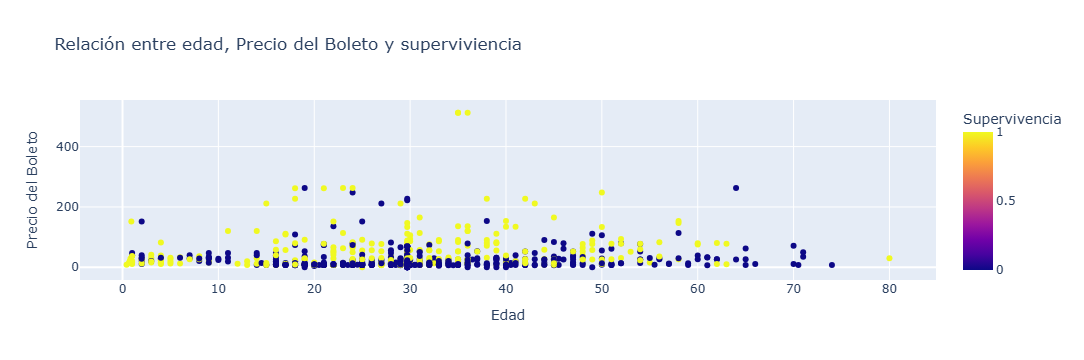

In [346]:
fig = px.scatter(datos, x="Age", y="Fare", color="Survived",
                 title="Relación entre edad, Precio del Boleto y superviviencia",
                 labels={"Age":"Edad","Fare":"Precio del Boleto", "Survived":"Supervivencia"})

fig.show()

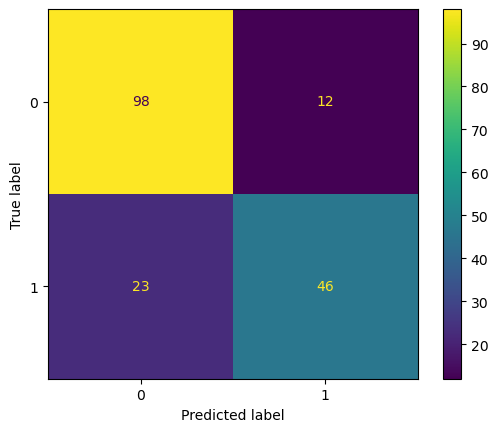

In [314]:
#Matrix de Confusión del modelo

cm=confusion_matrix(y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

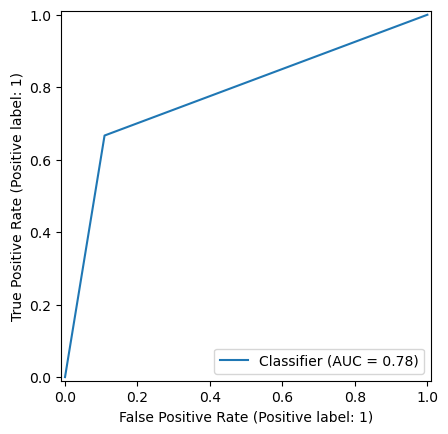

In [316]:
# Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, Prediccion)
plt.show()

<Axes: xlabel='Survived', ylabel='count'>

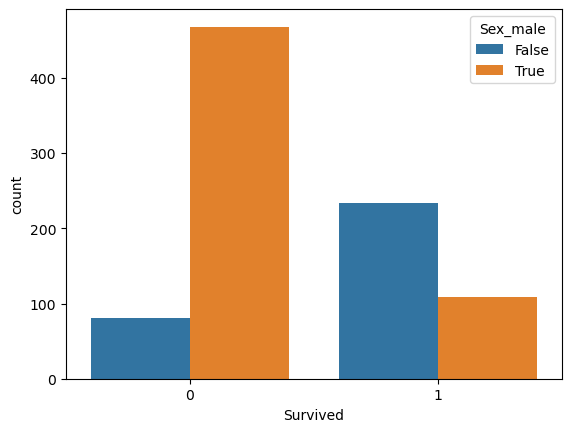

In [319]:
sns.countplot(x="Survived",data=datos,hue="Sex_male")

<Axes: xlabel='Survived', ylabel='count'>

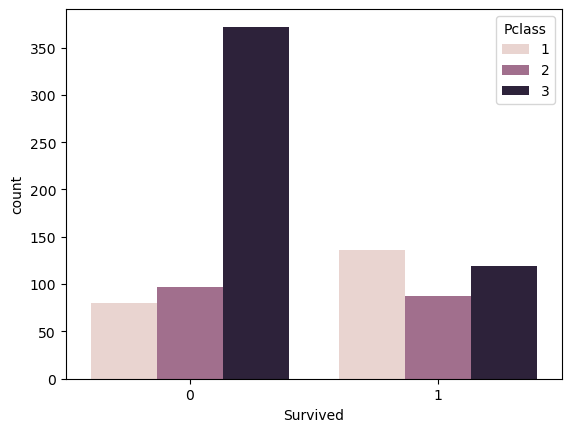

In [321]:
sns.countplot(x="Survived",data=datos,hue="Pclass")

<Axes: xlabel='Survived', ylabel='count'>

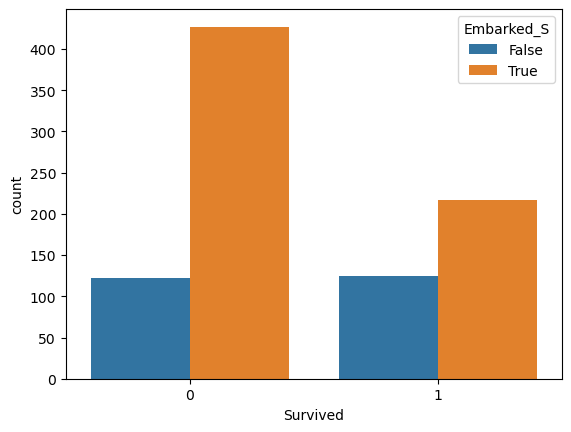

In [327]:
sns.countplot(x="Survived",data=datos,hue="Embarked_S")

<Axes: xlabel='Survived', ylabel='count'>

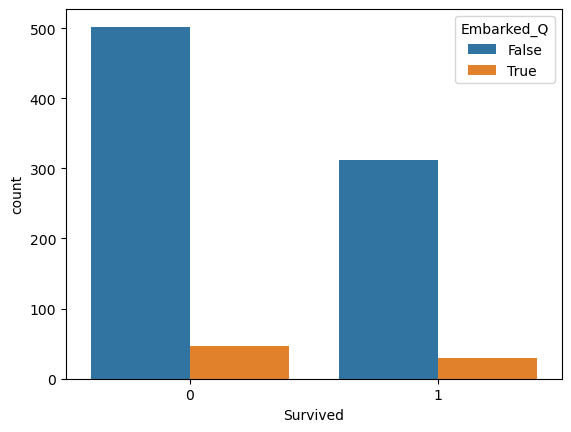

In [329]:
sns.countplot(x="Survived",data=datos,hue="Embarked_Q")

## 8. Interpretar, analizar y documentar los resultados obtenidos


De acuerdo con nuestro modelo podemos describir que:

. Precisión: Nos están indicando la proporción de predicciones positivas verdaderas en la matrix para las personas que sobrevivieron estaba en un 79%.

. Recall: Nos están indicando las proporciones y los valores obtenidos entre las instancias positivas reales en nuestro conjunto de datos,
para este modelo EL RECALL para los que sobrevivieron es de 0.67 lo que nos indica que en un 60% de pasajeros sobrevivieron.
    
. F1 Score: Para este modelo la medida F1 Score nos indica que la puntuación está dada en un 67%.

Matriz De Confusión podemos interpretar:
. Verdaderos negativos: el recuento de observaciones corresponde a la predicción correctamente como falso 98

. Verdaderos Positivos: EL recuento de observaciones corresponden a la predicción correctamente como Verdadero 46

. Falsos Positivos: El recuento de observaciones corresponde a la predicción incorrecta de como Verdaderas 12

. Falsos Negativos: El recuento de observaciones corresponde a la predicción incorrecta como Falso 23

De la curva de precisión podemos interpretar:

. El AUC es 0.78 lo que significa que el 78% de las predicciones son correctas en todos los umbrales de clasificación.

En las gráficas de barras podemos decir: que de acuerdo con los análisis la mayor probabilidad de sobrevivir era si eras de género femenino
de igual forma si pertenencias a una clase social sus probabilidades de sobrevivir también eran altas.
    
Podemos ver de igual forma el sitio donde embarcaste y la ubicación de tu camarote al momento del impacto también nos presenta una alta probabilidad
de sobrevivir. De igual el precio del boleto también es un dato relevante al momento de predecir que sobrevivieron.


